In [5]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# recive a file
# data = pd.read_excel("")


#this project I use of the random data
income = {
    2015: 10000,
    2016: 15000,
    2017: 18000,
    2018: 25000,
    2019: 22000,
    2020: 13000,
    2021: 15000,
    2022: 10000,
    2023: 32000,
    2024: 21000,
    2025: 40000
}

expenses = {
    2015: 2000,
    2016: 2500,
    2017: 3000,
    2018: 3500,
    2019: 4000,
    2020: 2800,
    2021: 1000,
    2022: 5000,
    2023: 1100,
    2024: 2400,
    2025: 4500
}

In [7]:
years = list(income.keys())  
income_values = list(income.values())  
expenses_values = list(expenses.values())  


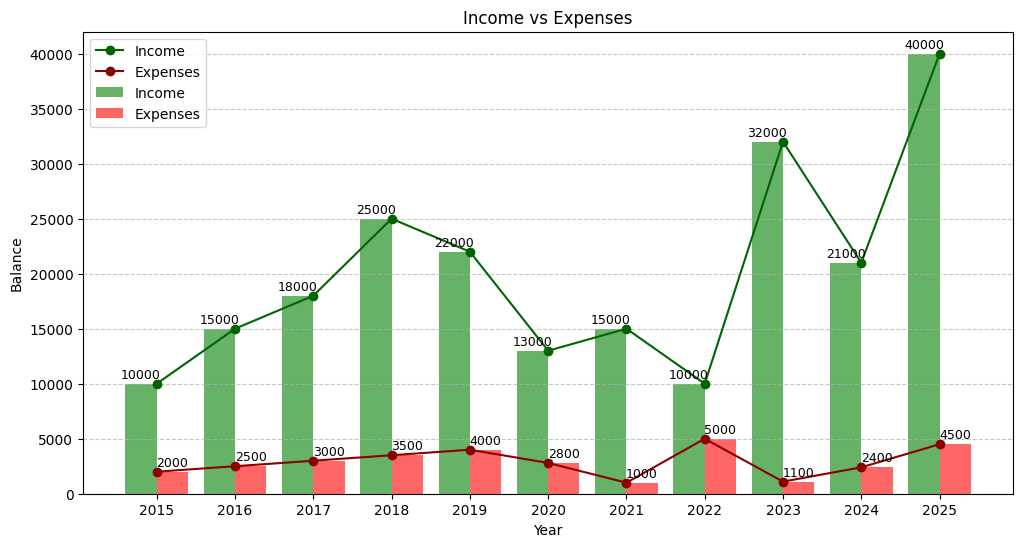

In [8]:
x = np.arange(len(years))
width = 0.4  

plt.figure(figsize=(12, 6))
# bar chart histogram
plt.bar(x - width/2, income_values, width=width, label="Income", color='green', alpha=0.6)
plt.bar(x + width/2, expenses_values, width=width, label="Expenses", color='red', alpha=0.6)
# Adding a line chart to show the trend of changes
plt.plot(x, income_values, marker='o', linestyle='-', color='darkgreen', label="Income")
plt.plot(x, expenses_values, marker='o', linestyle='-', color='darkred', label="Expenses")
# Adding labels on the bars
for i, v in enumerate(income_values):
    plt.text(i - width/2, v + 500, str(v), ha='center', fontsize=9, color='black')

for i, v in enumerate(expenses_values):
    plt.text(i + width/2, v + 500, str(v), ha='center', fontsize=9, color='black')

plt.xlabel("Year")
plt.ylabel("Balance")
plt.title("Income vs Expenses")
plt.xticks(x, years)
plt.legend() 
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()


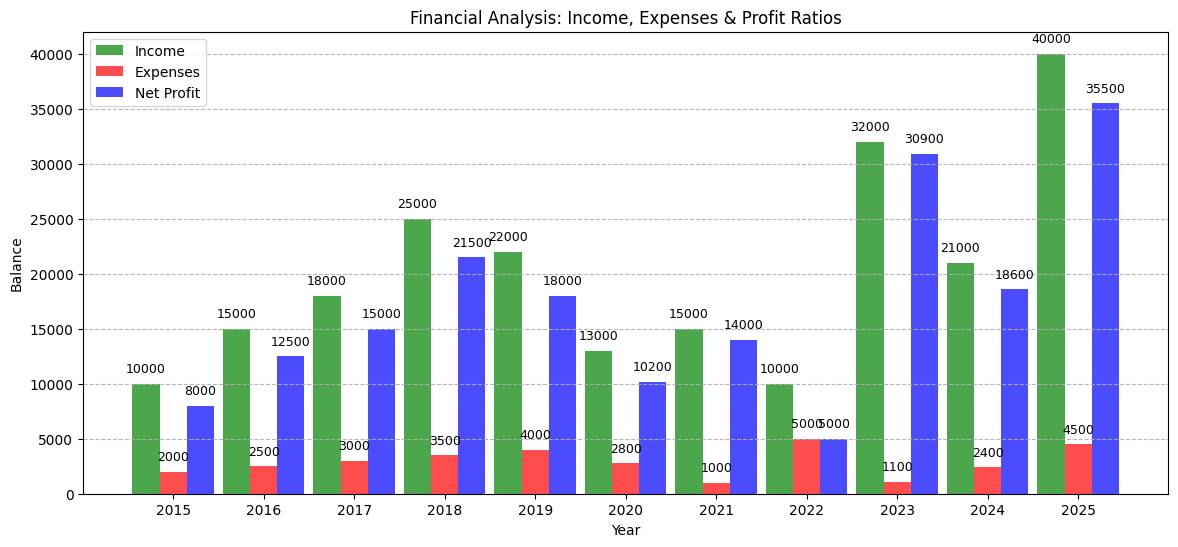

In [9]:
# Calculate net profit and loss
net_profit = {year: income[year] - expenses[year] for year in income}
# Calculate financial ratios
profit_margin = {year: (net_profit[year] / income[year]) * 100 for year in income}
expense_ratio = {year: (expenses[year] / income[year]) * 100 for year in income}

# Convert to list
years = list(income.keys())
income_values = list(income.values())
expenses_values = list(expenses.values())
net_profit_values = list(net_profit.values())
profit_margin_values = list(profit_margin.values())
expense_ratio_values = list(expense_ratio.values())

def chart():
    x = np.arange(len(years))
    width = 0.3
    plt.figure(figsize=(14, 6))
    plt.bar(x - width, income_values, width=width, label="Income", color='green', alpha=0.7)
    plt.bar(x, expenses_values, width=width, label="Expenses", color='red', alpha=0.7)
    plt.bar(x + width, net_profit_values, width=width, label="Net Profit", color='blue', alpha=0.7)
    
    # Add numbers on the bar chart
    for i, v in enumerate(income_values):
        plt.text(i - width, v + 1000, str(v), ha='center', fontsize=9, color='black')
    for i, v in enumerate(expenses_values):
        plt.text(i, v + 1000, str(v), ha='center', fontsize=9, color='black')
    for i, v in enumerate(net_profit_values):
        plt.text(i + width, v + 1000, str(v), ha='center', fontsize=9, color='black')

    plt.xlabel("Year")
    plt.ylabel("Balance")
    plt.title("Financial Analysis: Income, Expenses & Profit Ratios")
    plt.xticks(x, years)
    plt.legend()
    plt.grid(axis='y', linestyle="--", alpha=0.9)
    plt.show()

chart()


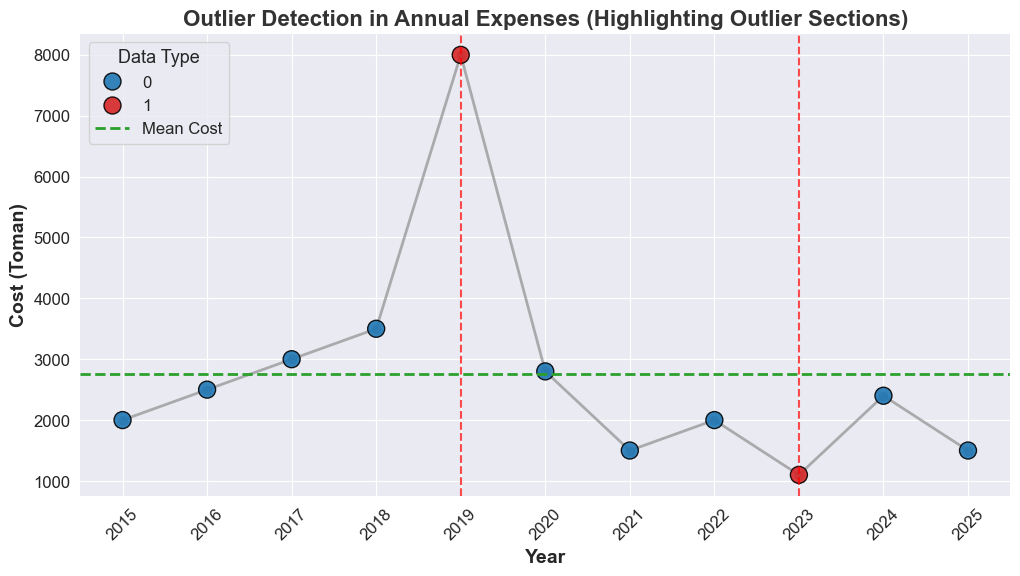

Outliers detected:
   Year  Cost  Outlier
4  2019  8000        1
8  2023  1100        1


In [10]:
sns.set_style("darkgrid")
plt.rcParams.update({"font.size": 12, "axes.labelweight": "bold"})

# use a random data
expenses = {
    2015: 2000,
    2016: 2500,
    2017: 3000,
    2018: 3500,
    2019: 8000,
    2020: 2800,
    2021: 1500,
    2022: 2000,
    2023: 1100,
    2024: 2400,
    2025: 1500
}

# Convert dictionary to DataFrame
df = pd.DataFrame(list(expenses.items()), columns=["Year", "Cost"])
# Outlier detection model
model = IForest(contamination=0.15)
model.fit(df[["Cost"]].values)
# Predict outliers
df["Outlier"] = model.predict(df[["Cost"]])

colors = {0: "#1f77b4", 1: "#d62728"}
fig, ax = plt.subplots(figsize=(12, 6), dpi=100)
plt.plot(df["Year"], df["Cost"], linestyle="solid", color="gray", alpha=0.6, linewidth=2, marker="o", zorder=1)
scatter = sns.scatterplot(
    x=df["Year"], y=df["Cost"], hue=df["Outlier"], palette=colors, s=150, edgecolor="black", alpha=0.9, zorder=2
)
plt.axhline(y=np.mean(df["Cost"]), color="#2ca02c", linestyle="dashed", linewidth=2, label="Mean Cost")

outliers_df = df[df["Outlier"] == 1] 
for i in outliers_df["Year"]:
    plt.axvline(x=i, color="red", linestyle="--", alpha=0.7)
plt.xlabel("Year", fontsize=14, fontweight="bold")
plt.ylabel("Cost (Toman)", fontsize=14, fontweight="bold")
plt.title("Outlier Detection in Annual Expenses (Highlighting Outlier Sections)", fontsize=16, fontweight="bold", color="#333")
plt.xticks(df["Year"], rotation=45)
sns.despine(left=True, bottom=True)
ax.legend(title="Data Type", fontsize=12, title_fontsize=13, loc="upper left", frameon=True)
plt.show()

print("Outliers detected:")
print(outliers_df)


Mean Squared Error: 1875855.647891197
R^2 Score: 0.9935964230618396


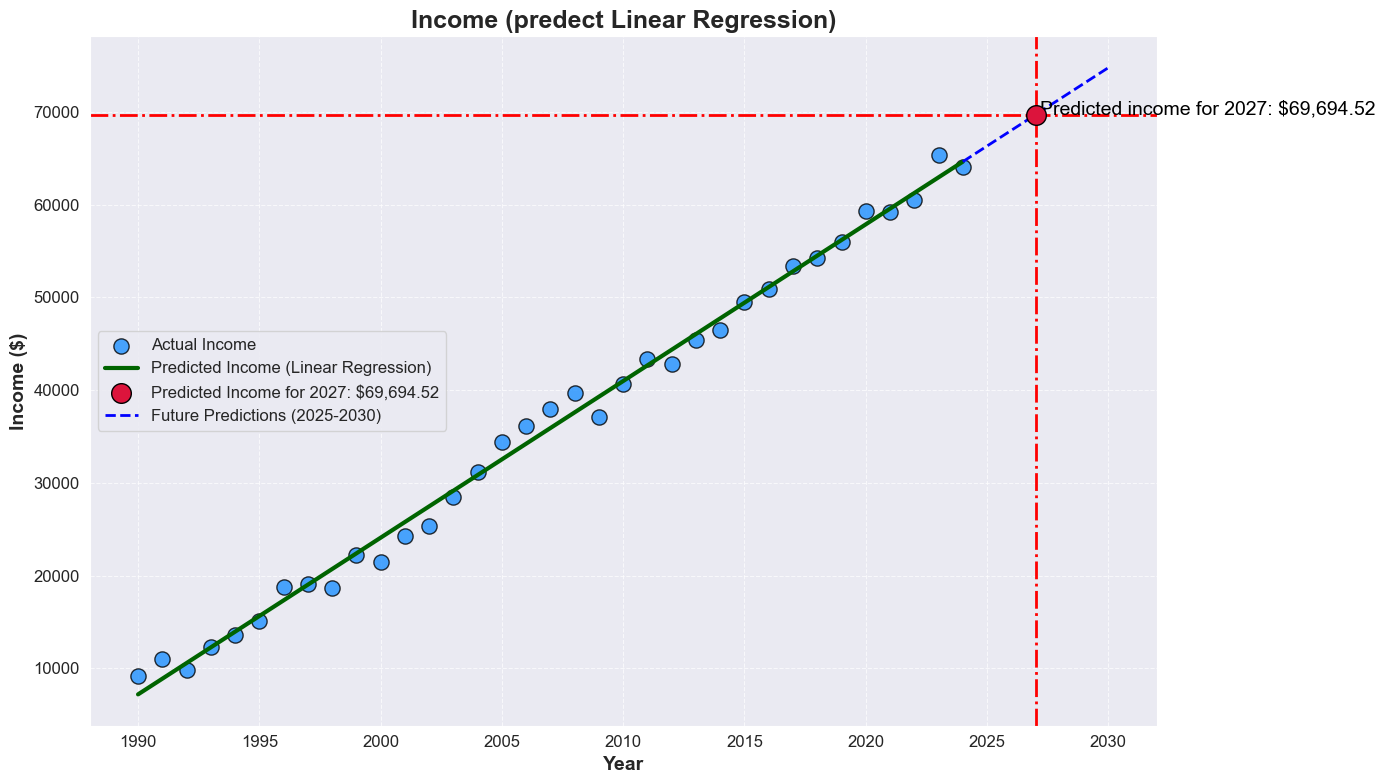

In [11]:
class IncomePrediction:
    def __init__(self, income_data):
        self.income_data = income_data
        self.model = LinearRegression()
        self.years = np.array(list(income_data.keys())).reshape(-1, 1)
        self.income_values = np.array(list(income_data.values()))
        self._prepare_data()

    def _prepare_data(self):
        np.random.seed(42)
        self.income_values += np.random.randint(-2000, 2000, size=self.income_values.shape)

    def fit_model(self):
        self.model.fit(self.years, self.income_values)

    def predict(self, year):
        return self.model.predict(np.array([[year]]))

    def evaluate_model(self):
        income_pred = self.model.predict(self.years)
        mse = mean_squared_error(self.income_values, income_pred)
        r2 = r2_score(self.income_values, income_pred)
        return mse, r2

    def plot_income_vs_years(self, predicted_income, year_to_predict):
        plt.figure(figsize=(14, 8))
        plt.scatter(self.years, self.income_values, color='dodgerblue', label='Actual Income', s=120, edgecolor='black', alpha=0.8)
        income_pred = self.model.predict(self.years)
        plt.plot(self.years, income_pred, color='darkgreen', label='Predicted Income (Linear Regression)', linewidth=3)
        plt.scatter(year_to_predict, predicted_income, color='crimson', s=200, label=f'Predicted Income for {year_to_predict}: ${predicted_income[0]:,.2f}', edgecolor='black', zorder=5)
        plt.axvline(x=year_to_predict, color='red', linestyle='-.', linewidth=2)
        plt.axhline(y=predicted_income, color='red', linestyle='-.', linewidth=2)
        future_years = np.arange(2024, 2031).reshape(-1, 1)
        future_predictions = self.model.predict(future_years)
        plt.plot(future_years, future_predictions, color='blue', linestyle='--', linewidth=2, label="Future Predictions (2025-2030)")
        plt.title('Income (predect Linear Regression)', fontsize=18, weight='bold')
        plt.xlabel('Year', fontsize=14)
        plt.ylabel('Income ($)', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(fontsize=12)
        plt.text(year_to_predict + 0.2, predicted_income, f'Predicted income for {year_to_predict}: ${predicted_income[0]:,.2f}', fontsize=14, color='black')
        plt.tight_layout()
        plt.show()

income_data = {1990: 8000, 1991: 9500, 1992: 11000, 1993: 13000, 1994: 14500, 1995: 16000, 1996: 17000, 1997: 18000, 1998: 19000, 1999: 22000, 2000: 23000, 2001: 25000, 2002: 27000, 2003: 29000, 2004: 31000, 2005: 33000, 2006: 35000, 2007: 37000, 2008: 38000, 2009: 39000, 2010: 41000, 2011: 42000, 2012: 44000, 2013: 45000, 2014: 47000, 2015: 48000, 2016: 50000, 2017: 53000, 2018: 55000, 2019: 57000, 2020: 59000, 2021: 60000, 2022: 62000, 2023: 64000, 2024: 66000}
income_predictor = IncomePrediction(income_data)
income_predictor.fit_model()
predicted_income_2027 = income_predictor.predict(2027)
mse, r2 = income_predictor.evaluate_model()
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
income_predictor.plot_income_vs_years(predicted_income_2027, 2027)
